In [1]:
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.table import Table
from astropy.time import Time
from astropy import units as u
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [2]:
f = fits.open('hetdex_vertices.fits')
ravals = []
decvals = []
for i in range(0,len(f[1].data['HETDEX_RA'][0])):
    ravals.append(f[1].data['HETDEX_RA'][0][i])
    decvals.append(f[1].data['HETDEX_DEC'][0][i])
ravals = np.array(ravals)
decvals = np.array(decvals)

In [3]:
def plotEverything(proj='nplaea'):
    if proj=='moll': m = Basemap(projection='moll',lon_0=90,resolution='l',celestial=True)
    else: m = Basemap(projection='nplaea',boundinglat=20,lon_0=310,resolution='l',celestial=True)
    m.drawparallels(np.arange(30,90,15),labels=[False,False,False,False],color='darkgray',fontsize=14)
    m.drawmeridians(np.arange(0,360,15),labels=[True,True,False,True],color='darkgray',latmax=90,fontsize=14)
    xpt,ypt=m(gal_coords.ra.deg,gal_coords.dec.deg)
#     xpt,ypt=m([0],[-10])
#     if not proj=='moll': m.plot(xpt,ypt,'o',markersize=3,alpha=0.2,label='',mfc='none',color='blue')
#     m.plot(xpt[-1],ypt[-1],'o',markersize=3,alpha=0.8,label='2MRS: 1000-12000kms',mfc='none',color='blue')
    xpt,ypt=m(lv_coords.ra.deg,lv_coords.dec.deg)
#     m.plot(xpt,ypt,'o',markersize=5,alpha=0.5,label='Local Volume: D<10 Mpc',mfc='darkorange',color='none') #Karachentsev
    for c in calibrators:
        xpt,ypt=m(c.ra.deg,c.dec.deg)
        m.plot(xpt,ypt,'o',markersize=7,label='',mfc='green',color='black')
    m.plot(xpt,ypt,'o',markersize=7,label='Bandpass/Pol Calibrators',mfc='green',color='black')
#     clstrs_n_lofar=[0,1,4,5,6,7,8,9]
#     xpt,ypt=m(a262_coords.ra.deg,a262_coords.dec.deg)
#     m.plot(xpt,ypt,'o',markersize=7,label='',mfc='red',color='black',alpha=0.9)
#     xpt,ypt=m(preferred[clstrs_n_lofar].ra.deg,preferred[clstrs_n_lofar].dec.deg)
#     m.plot(xpt,ypt,'o',markersize=7,label='LOFAR+Clusters',mfc='red',color='black',alpha=0.9)
#     other=[2,3]
    #xpt,ypt=m(preferred[other].ra.deg,preferred[other].dec.deg)
    #m.plot(xpt,ypt,'o',markersize=7,label='',mfc='gray',color='black',alpha=0.9)

#     #Draw SDSS:
#     a=np.array(range(7*15,17*15+1,5))+0.5*15
#     b=np.array(range(7*15,17*15+1,5))*0+60
#     m.plot(a,b,'-y',latlon=True,linewidth=1.2)
#     b=np.array(range(7*15,17*15+1,5))*0
#     m.plot([17.5*15,17.5*15],[0,60],'-y',latlon=True,linewidth=1.2)

    #Draw APERTIF preferred declination limit (+27d):
    a,b=np.array(range(0,360,3)),np.array(range(0,360,3))*0+27
    m.plot(a,b,'--r',latlon=True,linewidth=1.2, label='+27$^d$')

    #Draw HETDEX:
#     a=[162.5,165,170,175,180,185,190,195,200,205,210,215,220,225,227.5,235.1,
#        230,225,220,215,210,205,200,195,190,185,180,175,170,165,160,155,162.5]
#     b=[48.4,49,50.2,51.2,51.9,52.5,52.9,53,52.8,52.6,52.1,51.2,50.1,49,48.4,
#        56.4,58.1,59.5,60.7,61.5,62.2,62.7,62.9,63,62.9,62.6,62.1,61.6,60.6,
#        59.4,58.2,56.4,48.4]
#     b=np.array(b)-4.
#     m.plot(a,b,'-g',latlon=True,linewidth=1.2)
    m.plot(ravals,decvals,'-g',latlon=True,linewidth=1.2)
    a=[220,225,230,235,240,245,245,240,235,230,226.5]
    b=[54,54,54,54,54,54,47,47,47,47,47]
    m.plot(a,b,'-g',latlon=True,linewidth=1.2)

    #Draw Herschel-Atlas
    a=[191.298,190.515,208.505,207.683,191.298]
    b=[23.734,33.711,33.704,23.730,23.734]
    m.plot(a,b,'-r',latlon=True,linewidth=1.2)

    #Draw Perseus-Pisces
    a=[23.7,33.3,33.3,23.7,23.7]
    b=[29.9,29.9,37.9,37.9,29.9]
    m.plot(a,b,'-r',latlon=True,linewidth=1.2)

    #Draw Kovac CVn
    a=[184.98,191.76,191.76,184.19,184.98]
    b=[31.55, 31.55, 46.30, 46.30, 31.55]
    m.plot(a,b,'-b',latlon=True,linewidth=1.2)

#     ##Draw Shallow Northern Survey
#     a=np.array(range(0*15,4*15+1,5))
#     b=np.array(range(0*15,4*15+1,5))*0+28
#     m.plot(a,b,'-k',latlon=True,linewidth=1.4)
#     a=np.array(range(22*15,23*15+1,5))
#     b=np.array(range(22*15,23*15+1,5))*0+55
#     m.plot(a,b,'-k',latlon=True,linewidth=1.4)
#     a=np.array(range(22*15,24*15+1,5))
#     b=np.array(range(22*15,24*15+1,5))*0+28
#     m.plot(a,b,'-k',latlon=True,linewidth=1.4)

#     a=np.array(range(28,55,1))*0+22*15
#     b=np.array(range(28,55,1))
#     m.plot(a,b,'-k',latlon=True,linewidth=1.4)
#     a=np.array(range(28,90,1))*0+4*15
#     b=np.array(range(28,90,1))
#     m.plot(a,b,'-k',latlon=True,linewidth=1.4)
#     a=np.array(range(55,90,1))*0+23*15
#     b=np.array(range(55,90,1))
#     m.plot(a,b,'-k',latlon=True,linewidth=1.4)

#     a=np.array(range(183,226,5))
#     b=np.array(range(183,226,5))*0+29
#     m.plot(a,b,'-k',latlon=True,linewidth=1.4)
#     b=np.array(range(183,226,5))*0+59
#     m.plot(a,b,'-k',latlon=True,linewidth=1.4)
#     a=np.array(range(29,59,1))*0+183
#     b=np.array(range(29,59,1))
#     m.plot(a,b,'-k',latlon=True,linewidth=1.4)
#     a=np.array(range(29,59,1))*0+226
#     b=np.array(range(29,59,1))
#     m.plot(a,b,'-k',latlon=True,linewidth=1.4)
    return m

In [4]:
flux_names = ['3C147', '3C196']
pol_names = ['3C138', '3C286']#, 'CTD93', '3C48']
all_cal_names = flux_names + pol_names
calibrators = [SkyCoord.from_name(name) for name in all_cal_names]

In [5]:
lofar_names = ['Elias-N','GOODS-N','Bootes?','Lockman']
lofar_ra = [242.75,189.2291666667,218.0,161.75]
lofar_dec = [55.0,62.2375,34.5,58.0833333333]
lofar_coord = SkyCoord(ra=lofar_ra, dec=lofar_dec, unit='deg')

In [6]:
tbl = Table.read("../../2mrs/2mrs_v240.st",format='ascii')

v_min=1   #units of 1000
v_max=12
galra=[]
galdec=[]
for r in range(len(tbl)):
    if tbl[r]['decd'] >= 20. and tbl[r]['st'] >= v_min and tbl[r]['st'] < v_max:
        galra.append(str(tbl[r]['rah'])+'h'+str(tbl[r]['ram'])+'m'+str(tbl[0]['ras'])+'s')
        #galra[r]=ra[r].wrap_at(180*u.degree)
        galdec.append(str(tbl[r]['decd'])+'d'+str(tbl[r]['decm'])+'m'+str(tbl[0]['decs'])+'s')
                 
gal_coords = SkyCoord(ra=galra,dec=galdec,unit='deg')

In [7]:
kara=Table.read('../../2mrs/karachentsev_localvol_table1.dat.txt',format='ascii.fixed_width')
lvra=[]
lvdec=[]
for i in range(len(kara)):
    if int(kara['J2000.0'][i][8:11]) >= 0:
        lvra.append(str(kara['J2000.0'][i][0:2]+'h'+kara['J2000.0'][i][2:4]+'m'+kara['J2000.0'][i][4:8]+'s'))
        lvdec.append(str(kara['J2000.0'][i][8:11]+'d'+kara['J2000.0'][i][11:13]+'m'+kara['J2000.0'][i][13:17]+'s'))
lv_coords = SkyCoord(ra=lvra,dec=lvdec,unit='deg')

In [8]:
sched=Table.read('ancillary_data/all_sched.csv')
# sched=Table.read('imaging_test.csv')
sched_coord=SkyCoord(ra=sched['ra'],dec=sched['dec'],unit=[u.hour,u.deg])

In [9]:
# survey=Table.read('tests/for_betsey.2may19.txt',format='ascii.fixed_width')
# survey=Table.read('old_pointings/apertif_v6.10mar20.txt',format='ascii.fixed_width')
# survey=Table.read('ancillary_data/all_pointings.v6.27dec19.txt',format='ascii.fixed_width')
survey=Table.read('ancillary_data/all_pointings.v7.18jun20.txt',format='ascii.fixed_width')
# survey=Table.read('ancillary_data/apertif_v11.18jun20.txt',format='ascii.fixed_width')

In [10]:
survey_coord=SkyCoord(survey['hmsdms'][(survey['label'] == 's') | (survey['label'] == 'm') | (survey['label'] == 'l')])
mds_coord=SkyCoord(survey['hmsdms'][(survey['label'] == 'm') | (survey['label'] == 'l') | (survey['label'] == 'o')])

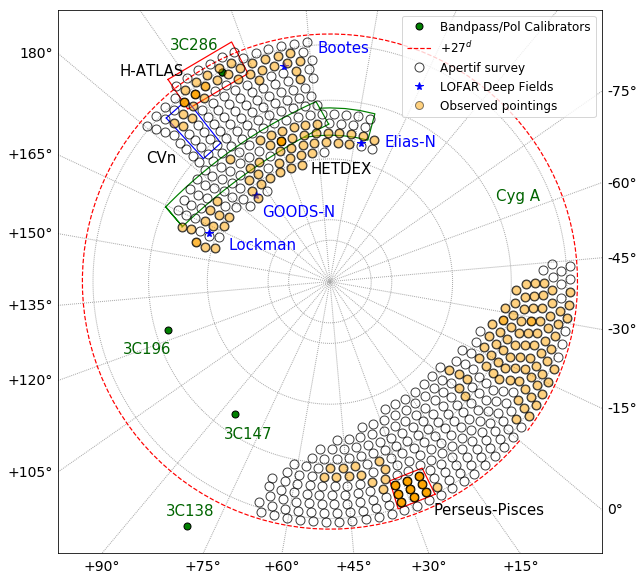

In [11]:
plt.figure(figsize=[10,10])
m=plotEverything()
xpt,ypt=m(survey_coord.ra.deg,survey_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=9,alpha=0.75,label='Apertif survey',mfc='none', markeredgecolor='black')

xpt,ypt=m(lofar_coord.ra.deg,lofar_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=8,alpha=1.0,label='LOFAR Deep Fields',color='blue', marker='*')

# xpt,ypt=m(biggal_coord.ra.deg,biggal_coord.dec.deg)
# m.plot(xpt,ypt,'o',markersize=8,alpha=1.0,label='Messier etc',mfc='orange', markeredgecolor='black')

xpt,ypt=m(sched_coord.ra.deg,sched_coord.dec.deg)
m.plot(xpt,ypt,'o',markersize=8,alpha=0.5,label='Observed pointings',mfc='orange', markeredgecolor='black')
# m.plot(-100,-100,'o',markersize=8,alpha=0.5,label='Observed pointings',mfc='orange', markeredgecolor='black')

# xpt,ypt=m(mds_coord.ra.deg,mds_coord.dec.deg)
# m.plot(xpt,ypt,'o',markersize=8,alpha=0.3,label='Medium-deep pointings',mfc='red', markeredgecolor='black')
# m.plot(-100,-100,'o',markersize=8,alpha=0.3,label='Medium-deep pointings',mfc='red', markeredgecolor='black')

plt.legend(loc=1, fontsize='large')
textlabel=['H-ATLAS','CVn','HETDEX','Perseus-Pisces']
# plt.legend(loc=1, fontsize='large', framealpha=1.0, bbox_to_anchor=(1.25, 1.00))
xlab,ylab=m([184.5,173,220,26],[13,35,63,25])
for i in range(len(xlab)): plt.text(xlab[i],ylab[i],s=textlabel[i],fontsize=15)
textlabel=['3C147','3C138','3C196','3C286','Cyg A']
xlab,ylab=m([84,85,121,195.5,294],[43,16,35,17,44])
for i in range(len(xlab)): plt.text(xlab[i],ylab[i],s=textlabel[i],fontsize=15,color='darkgreen')
textlabel = ['Elias-N','GOODS-N','Bootes','Lockman']
xlab,ylab = m([252,184,227,158],[54,67,32,64])
for i in range(len(xlab)): plt.text(xlab[i],ylab[i],s=textlabel[i],fontsize=15,color='blue')
# plt.savefig('../scheduling/apersched/ancillary_data/apertif_v6.10mar20.png',dpi=150,bbox_inches='tight')
# plt.savefig('/Users/hess/apertif/scheduling/apersched/ancillary_data/apertif_pointings_ncp.v4.png',dpi=150,bbox_inches='tight')
plt.savefig('/Users/hess/apertif/observed.11aug20.png',dpi=150,bbox_inches='tight')